In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plts
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# import mysql.connector as sql
import sqlite3

from sqlalchemy import create_engine

### After Data Has been cleaned we can perform Bivariate Analysis on NUMERIC columns to get a better insight of the data

In [19]:
clean_customerData = pd.read_csv('./CleanData/clean_annual_income_and_age.csv')
clean_customerData.head(3)

,Unnamed: 0,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married


In [20]:
clean_customerData.columns

Index(['Unnamed: 0', 'cust_id', 'name', 'gender', 'age', 'location',
       'occupation', 'annual_income', 'marital_status'],
      dtype='object')

In [21]:
clean_customerData = clean_customerData.drop('Unnamed: 0', axis=1)

In [22]:
clean_customerData.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married


In [23]:
clean_customerData.shape

(1000, 8)

In [24]:
clean_creditScoreData = pd.read_csv('./CleanData/clean_credit_score_data.csv')
clean_creditScoreData.head(3)

,Unnamed: 0,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0


In [25]:
clean_creditScoreData.columns

Index(['Unnamed: 0', 'cust_id', 'credit_score', 'credit_utilisation',
       'outstanding_debt', 'credit_inquiries_last_6_months', 'credit_limit',
       'credit_score_range', 'credit_limit_mode'],
      dtype='object')

In [26]:
clean_creditScoreData = clean_creditScoreData.drop('Unnamed: 0', axis=1)

In [27]:
clean_creditScoreData.head(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0


In [28]:
clean_creditScoreData.shape,

((1000, 8),)

In [29]:
mergedData = clean_customerData.merge(clean_creditScoreData, on='cust_id', how='inner')
mergedData

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [30]:
mergedData[['credit_score','credit_limit','outstanding_debt']].corr()

,credit_score,credit_limit,outstanding_debt
credit_score,1.000000,0.847951,0.680654
credit_limit,0.847951,1.000000,0.810581
outstanding_debt,0.680654,0.810581,1.000000


In [31]:
corrMatrix = mergedData[['credit_score','credit_limit','outstanding_debt','age','annual_income','credit_utilisation','credit_inquiries_last_6_months']].corr()
corrMatrix

,credit_score,credit_limit,outstanding_debt,age,annual_income,credit_utilisation,credit_inquiries_last_6_months
credit_score,1.000000,0.847951,0.680654,0.444917,0.575751,-0.070445,-0.001226
credit_limit,0.847951,1.000000,0.810581,0.510980,0.684780,-0.080504,0.014716
outstanding_debt,0.680654,0.810581,1.000000,0.444301,0.555661,0.192838,0.019793
age,0.444917,0.510980,0.444301,1.000000,0.619037,-0.027713,-0.025831
annual_income,0.575751,0.684780,0.555661,0.619037,1.000000,-0.086368,0.002747
credit_utilisation,-0.070445,-0.080504,0.192838,-0.027713,-0.086368,1.000000,-0.013952
credit_inquiries_last_6_months,-0.001226,0.014716,0.019793,-0.025831,0.002747,-0.013952,1.000000


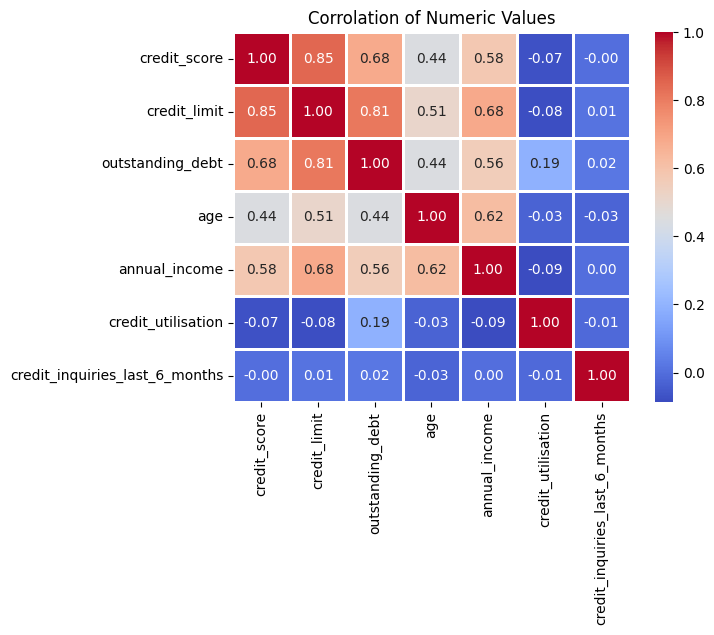

In [33]:
sns.heatmap(corrMatrix, annot=True,fmt=".2f",cmap='coolwarm',linewidths=0.8)
plt.title('Corrolation of Numeric Values')
plt.show()

In [ ]:
mergedData